In [33]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance

Importing our dataset

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
dataset=pd.read_csv('/content/drive/MyDrive/ML/Thesis/my_dataset/Detection/Ensemble/AU-PEMal-2023.csv')
dataset

,md5,sha1,EntryPoint,bytes_on_last_page,pages_in_file,relocations,size_of_header,min_extra_paragraphs,max_extra_paragraphs,init_ss_value,...,total_procsses,files_malicious,files_suspicious,files_text,files_unknown,dlls_calls,apis,Class,Category,Family
0,d5aa2b2506dd71b65307bb551a6a099d,62f4d55a1bb8396e493d7815dc44febed7161535,67820,144,3,0,4,0,65535,0,...,0.0,0.0,0.0,0.0,0.0,6.0,162.0,Benign,Benign,Benign
1,8d1178cec97f96a9ede3efe2f30ef30e,ca40945a4e35d48794a5e13aacf16b8ae1caddeb,2477980,144,3,0,4,0,65535,0,...,93.0,0.0,0.0,0.0,0.0,22.0,778.0,Benign,Benign,Benign
2,c08d7afb7966f452cf5aa9283fe8880a,6f47b50480bea61ae4dfb75c12582990cc5ce770,10878,144,3,0,4,0,65535,0,...,35.0,0.0,0.0,0.0,0.0,1.0,1.0,Benign,Benign,Benign
3,3554a3a99e7ffb57552aedcb2520f1d2,8c3d5b506a8d55f42f4c83ead3e4341255d1acfc,412832,144,3,4,0,0,65535,0,...,0.0,0.0,0.0,0.0,0.0,1.0,40.0,Benign,Benign,Benign
4,5be9511d42136df49d9501680e84109f,0a7d0c68c591db2f197b2169d226bebe6e9bdabe,113070,144,3,0,4,0,65535,0,...,36.0,0.0,0.0,0.0,0.0,1.0,1.0,Benign,Benign,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21747,3aabbbed7dd5e3589f2387ec1a62471f,067d84bef48f6abc37226c6ccb981d21f7c8b93f,559542,144,3,0,4,0,65535,0,...,29.0,0.0,0.0,0.0,0.0,1.0,1.0,Malware,Stealer,Snake
21748,c62343c3c6463795e88fe0a2a81c82b3,02df1939b04bc7de83c3029c5eb8e9b25cc9be91,631538,144,3,0,4,0,65535,0,...,32.0,0.0,0.0,0.0,0.0,1.0,1.0,Malware,Stealer,Snake
21749,db92e74aee2f64a0b40a64c1a014e257,fde61811f7ae53f9fa59e17fb5c2c6143a48b282,631538,144,3,0,4,0,65535,0,...,35.0,0.0,0.0,0.0,0.0,1.0,1.0,Malware,Stealer,Snake
21750,06e50d688d5b79ffea6135c7a55402cd,ad58274e8425775b284ee1f314f879100d437340,631538,144,3,0,4,0,65535,0,...,29.0,0.0,0.0,0.0,0.0,1.0,1.0,Malware,Stealer,Snake


In [62]:
dataset.Class.value_counts()

Benign     10876
Malware    10876
Name: Class, dtype: int64

In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21752 entries, 0 to 21751
Data columns (total 59 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   md5                      21752 non-null  object 
 1   sha1                     21752 non-null  object 
 2   EntryPoint               21752 non-null  int64  
 3   bytes_on_last_page       21752 non-null  int64  
 4   pages_in_file            21752 non-null  int64  
 5   relocations              21752 non-null  int64  
 6   size_of_header           21752 non-null  int64  
 7   min_extra_paragraphs     21752 non-null  int64  
 8   max_extra_paragraphs     21752 non-null  int64  
 9   init_ss_value            21752 non-null  int64  
 10  init_sp_value            21752 non-null  int64  
 11  init_ip_value            21752 non-null  int64  
 12  init_cs_value            21752 non-null  int64  
 13  over_lay_number          21752 non-null  int64  
 14  address_of_ne_header  

In [64]:
new_dataset=dataset.drop(['md5', 'sha1', 'Category', 'Family'], axis=1)
new_dataset

,EntryPoint,bytes_on_last_page,pages_in_file,relocations,size_of_header,min_extra_paragraphs,max_extra_paragraphs,init_ss_value,init_sp_value,init_ip_value,...,processes_suspicious,processes_monitored,total_procsses,files_malicious,files_suspicious,files_text,files_unknown,dlls_calls,apis,Class
0,67820,144,3,0,4,0,65535,0,184,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,162.0,Benign
1,2477980,144,3,0,4,0,65535,0,184,0,...,0.0,2.0,93.0,0.0,0.0,0.0,0.0,22.0,778.0,Benign
2,10878,144,3,0,4,0,65535,0,184,0,...,0.0,1.0,35.0,0.0,0.0,0.0,0.0,1.0,1.0,Benign
3,412832,144,3,4,0,0,65535,0,139,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40.0,Benign
4,113070,144,3,0,4,0,65535,0,184,0,...,0.0,1.0,36.0,0.0,0.0,0.0,0.0,1.0,1.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21747,559542,144,3,0,4,0,65535,0,184,0,...,0.0,2.0,29.0,0.0,0.0,0.0,0.0,1.0,1.0,Malware
21748,631538,144,3,0,4,0,65535,0,184,0,...,0.0,2.0,32.0,0.0,0.0,0.0,0.0,1.0,1.0,Malware
21749,631538,144,3,0,4,0,65535,0,184,0,...,0.0,3.0,35.0,0.0,0.0,0.0,0.0,1.0,1.0,Malware
21750,631538,144,3,0,4,0,65535,0,184,0,...,0.0,2.0,29.0,0.0,0.0,0.0,0.0,1.0,1.0,Malware


In [65]:
new_dataset.head(5)

,EntryPoint,bytes_on_last_page,pages_in_file,relocations,size_of_header,min_extra_paragraphs,max_extra_paragraphs,init_ss_value,init_sp_value,init_ip_value,...,processes_suspicious,processes_monitored,total_procsses,files_malicious,files_suspicious,files_text,files_unknown,dlls_calls,apis,Class
0,67820,144,3,0,4,0,65535,0,184,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,162.0,Benign
1,2477980,144,3,0,4,0,65535,0,184,0,...,0.0,2.0,93.0,0.0,0.0,0.0,0.0,22.0,778.0,Benign
2,10878,144,3,0,4,0,65535,0,184,0,...,0.0,1.0,35.0,0.0,0.0,0.0,0.0,1.0,1.0,Benign
3,412832,144,3,4,0,0,65535,0,139,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40.0,Benign
4,113070,144,3,0,4,0,65535,0,184,0,...,0.0,1.0,36.0,0.0,0.0,0.0,0.0,1.0,1.0,Benign


In [66]:
new_dataset.describe(include=[int, float])

,EntryPoint,bytes_on_last_page,pages_in_file,relocations,size_of_header,min_extra_paragraphs,max_extra_paragraphs,init_ss_value,init_sp_value,init_ip_value,...,processes_malicious,processes_suspicious,processes_monitored,total_procsses,files_malicious,files_suspicious,files_text,files_unknown,dlls_calls,apis
count,2.175200e+04,21752.000000,21752.00000,21752.000000,21752.000000,21752.000000,21752.000000,21752.000000,21752.000000,21752.000000,...,21752.000000,21752.000000,21752.000000,21752.000000,21752.00000,21752.000000,21752.000000,21752.000000,21752.000000,21752.000000
mean,1.438842e+06,450.283376,239.82466,202.162008,188.978439,281.727381,63868.499448,186.974163,381.172950,269.866633,...,1.820614,0.342497,8.272113,42.581602,8.36507,356.610656,72.548777,29.032135,4.621828,95.685408
std,3.529427e+07,3462.521418,3016.80135,2844.851873,2696.786886,3642.192367,9994.361832,2605.450948,2714.224987,3376.805468,...,15.786036,3.082385,41.677590,51.766211,44.64347,1965.171138,371.995907,225.768247,5.784234,161.853316
min,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.388800e+04,144.000000,3.00000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.000000,0.000000,...,0.000000,0.000000,1.000000,34.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,4.822200e+04,144.000000,3.00000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.000000,0.000000,...,1.000000,0.000000,2.000000,37.000000,0.00000,0.000000,0.000000,0.000000,2.000000,32.000000
75%,3.932160e+05,144.000000,3.00000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.000000,0.000000,...,2.000000,0.000000,6.000000,44.000000,1.00000,4.000000,3.000000,1.000000,7.000000,127.000000
max,3.422618e+09,65167.000000,62922.00000,61843.000000,64750.000000,63971.000000,65535.000000,57995.000000,61543.000000,61326.000000,...,1350.000000,229.000000,3247.000000,3295.000000,1104.00000,63152.000000,9951.000000,14075.000000,134.000000,3575.000000


In [67]:
new_dataset.describe(include=[object]).transpose()

,count,unique,top,freq
Class,21752,2,Benign,10876


In [68]:
new_dataset.duplicated().any()

True

In [69]:
print('Data size BEFORE deleteting instances with duplicate values: ', new_dataset.shape[0], end='\n\n')

# Remove duplicate rows
new_dataset.drop_duplicates(inplace=True, keep=False, ignore_index=True)

print('Data size AFTER deleteting instances containing duplicate values: ', new_dataset.shape[0])

Data size BEFORE deleteting instances with duplicate values:  21752

Data size AFTER deleteting instances containing duplicate values:  21477


# Dealing with missing values

In [70]:
new_dataset.isnull().sum().sum()

0

# Dealing with infinite values

In [71]:
np.all(np.isfinite(new_dataset.drop(['Class'], axis=1)))

True

In [73]:
new_dataset.Class.value_counts()

Malware    10765
Benign     10712
Name: Class, dtype: int64

In [74]:
new_dataset.dtypes

EntryPoint                   int64
bytes_on_last_page           int64
pages_in_file                int64
relocations                  int64
size_of_header               int64
min_extra_paragraphs         int64
max_extra_paragraphs         int64
init_ss_value                int64
init_sp_value                int64
init_ip_value                int64
init_cs_value                int64
over_lay_number              int64
address_of_ne_header         int64
SizeOfCode                   int64
SizeOfInitializedData        int64
SizeOfUninitializedData      int64
BaseOfCode                   int64
BaseOfData                   int64
ImageBase                    int64
SectionAlignment             int64
FileAlignment                int64
SizeOfImage                  int64
SizeOfHeaders                int64
Checksum                     int64
SizeofStackReserve           int64
SizeofStackCommit            int64
SizeofHeapCommit             int64
SizeofHeapReserve            int64
LoaderFlags         

In [75]:
dataset_std = new_dataset.std(numeric_only=True)
dataset_std

EntryPoint                 3.551916e+07
bytes_on_last_page         3.484442e+03
pages_in_file              3.035935e+03
relocations                2.862916e+03
size_of_header             2.713916e+03
min_extra_paragraphs       3.665297e+03
max_extra_paragraphs       1.003748e+04
init_ss_value              2.621993e+03
init_sp_value              2.731453e+03
init_ip_value              3.398218e+03
init_cs_value              3.402526e+03
over_lay_number            4.254286e+03
address_of_ne_header       7.192090e+01
SizeOfCode                 5.408033e+07
SizeOfInitializedData      5.942802e+07
SizeOfUninitializedData    1.963916e+09
BaseOfCode                 2.213742e+08
BaseOfData                 2.286751e+08
ImageBase                  2.351372e+12
SectionAlignment           5.806908e+03
FileAlignment              1.922473e+03
SizeOfImage                2.238423e+08
SizeOfHeaders              2.308360e+03
Checksum                   8.074161e+08
SizeofStackReserve         8.959349e+06


In [76]:
# Find Features that meet the threshold
constant_features = [column for column, std in dataset_std.iteritems() if std < 0.01]

# Drop the constant features
new_dataset.drop(labels=constant_features, axis=1, inplace=True)

In [77]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EntryPoint               21477 non-null  int64  
 1   bytes_on_last_page       21477 non-null  int64  
 2   pages_in_file            21477 non-null  int64  
 3   relocations              21477 non-null  int64  
 4   size_of_header           21477 non-null  int64  
 5   min_extra_paragraphs     21477 non-null  int64  
 6   max_extra_paragraphs     21477 non-null  int64  
 7   init_ss_value            21477 non-null  int64  
 8   init_sp_value            21477 non-null  int64  
 9   init_ip_value            21477 non-null  int64  
 10  init_cs_value            21477 non-null  int64  
 11  over_lay_number          21477 non-null  int64  
 12  address_of_ne_header     21477 non-null  int64  
 13  SizeOfCode               21477 non-null  int64  
 14  SizeOfInitializedData 

Some features such as bwd_psh_flags, fwd_urg_flags, bwd_urg_flags, cwe_flag_count, fwd_avg_bytes_bulk, fwd_avg_packets_bulk, fwd_avg_bulk_rate, bwd_avg_bytes_bulk, bwd_avg_packets_bulk, bwd_avg_bulk_rate don't vary. Hence, the correlation is NaN by definition.

# Observing the outliers

In [78]:
Q1 = new_dataset.quantile(0.25)
Q3 = new_dataset.quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers with interquartile range
filt = (new_dataset < (Q1 - 1.5 * IQR)) | (new_dataset > (Q3 + 1.5 * IQR))
print(filt.sum())

BaseOfCode                 3029
BaseOfData                 2736
Checksum                   3565
Class                         0
EntryPoint                 2645
FileAlignment              4243
ImageBase                  4303
LoaderFlags                  13
SectionAlignment           2079
SizeOfCode                 2479
SizeOfHeaders              8887
SizeOfImage                3242
SizeOfInitializedData      3658
SizeOfUninitializedData    2060
SizeofHeapCommit           2796
SizeofHeapReserve          2777
SizeofStackCommit          4089
SizeofStackReserve         4343
address_of_ne_header         79
apis                       1588
bytes_on_last_page         2108
dlls_calls                  860
files_malicious            3626
files_suspicious           4608
files_text                 4153
files_unknown              4607
init_cs_value               191
init_ip_value               232
init_sp_value               939
init_ss_value               152
max_extra_paragraphs        635
min_extr

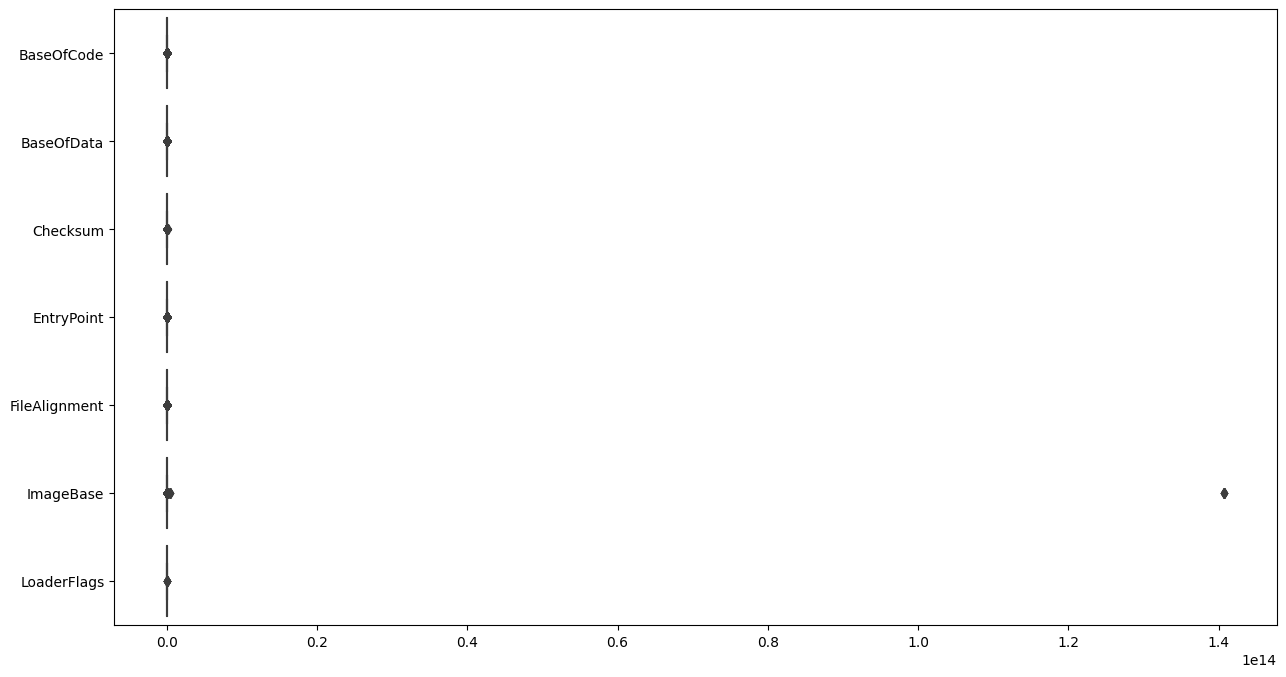

In [81]:
fig = plt.figure(figsize=(15, 8))
sns.boxplot(data=new_dataset[["BaseOfCode", "BaseOfData", "Checksum", "EntryPoint", "FileAlignment", "ImageBase", "LoaderFlags"]], orient="h")

#plt.title('Summary of some variables containing outliers', fontsize=18)
plt.show()

In [83]:
# Assuming you have a DataFrame named 'df'
categorical_columns = new_dataset.select_dtypes(include=['object', 'category']).columns
categorical_columns =[ 'Class']
new_dataset = pd.DataFrame(new_dataset)

# Data Exploration

In [84]:
dataset_corr = new_dataset.corr()
dataset_corr.head(5)

,EntryPoint,bytes_on_last_page,pages_in_file,relocations,size_of_header,min_extra_paragraphs,max_extra_paragraphs,init_ss_value,init_sp_value,init_ip_value,...,processes_malicious,processes_suspicious,processes_monitored,total_procsses,files_malicious,files_suspicious,files_text,files_unknown,dlls_calls,apis
EntryPoint,1.000000,-0.001437,0.000700,0.000479,-0.000528,-0.000796,0.001950,-0.001399,-0.000308,-0.000934,...,-0.002307,-0.003127,-0.004833,-0.007182,-0.006365,-0.006176,-0.006344,-0.004810,0.011075,-0.010840
bytes_on_last_page,-0.001437,1.000000,0.415223,0.468226,0.476630,0.506518,-0.129849,0.611740,0.524766,0.472680,...,-0.007538,-0.008310,-0.005408,-0.008248,-0.015805,-0.012308,-0.004288,-0.009605,-0.023275,-0.023419
pages_in_file,0.000700,0.415223,1.000000,0.513407,0.454848,0.377011,-0.130453,0.373055,0.431829,0.365830,...,-0.007530,-0.008009,-0.007868,-0.011766,-0.013001,-0.013649,-0.013524,-0.009855,-0.013335,-0.016584
relocations,0.000479,0.468226,0.513407,1.000000,0.523519,0.474226,-0.165255,0.517339,0.497662,0.394499,...,-0.006204,-0.006885,-0.002444,-0.001822,-0.012282,-0.011917,-0.008455,-0.008163,-0.003633,-0.013160
size_of_header,-0.000528,0.476630,0.454848,0.523519,1.000000,0.593564,-0.152455,0.592852,0.499485,0.544335,...,-0.005605,-0.006395,-0.003889,-0.002791,-0.012526,-0.007557,-0.002805,-0.006959,-0.020591,-0.011166


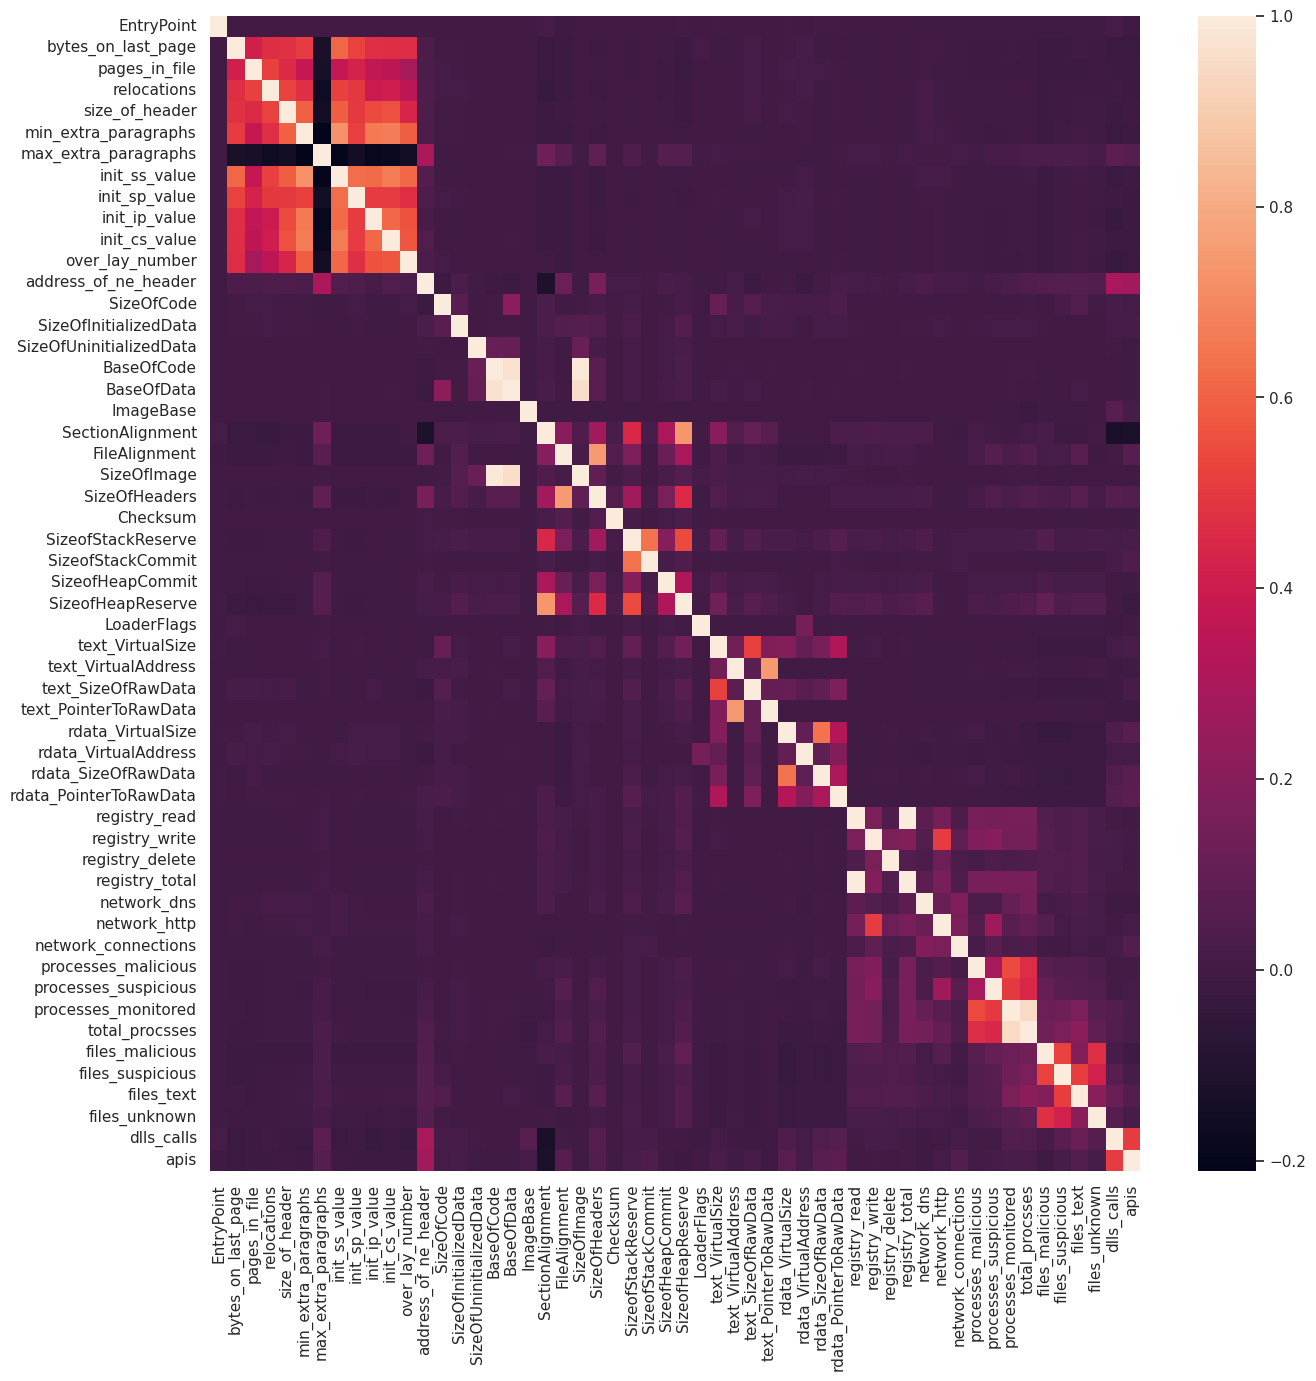

In [85]:
fig = plt.figure(figsize=(15, 15))
sns.set(font_scale=1.0)
ax = sns.heatmap(dataset_corr, annot=False)

In [86]:
# Create & Apply mask
mask = np.triu(np.ones_like(dataset_corr, dtype=bool))
tri_df = dataset_corr.mask(mask)

# Find Features that meet the threshold
correlated_features = [c for c in tri_df.columns if any(tri_df[c] > 0.98)]

# Drop the highly correlated features
new_dataset.drop(labels=correlated_features, axis=1, inplace=True)

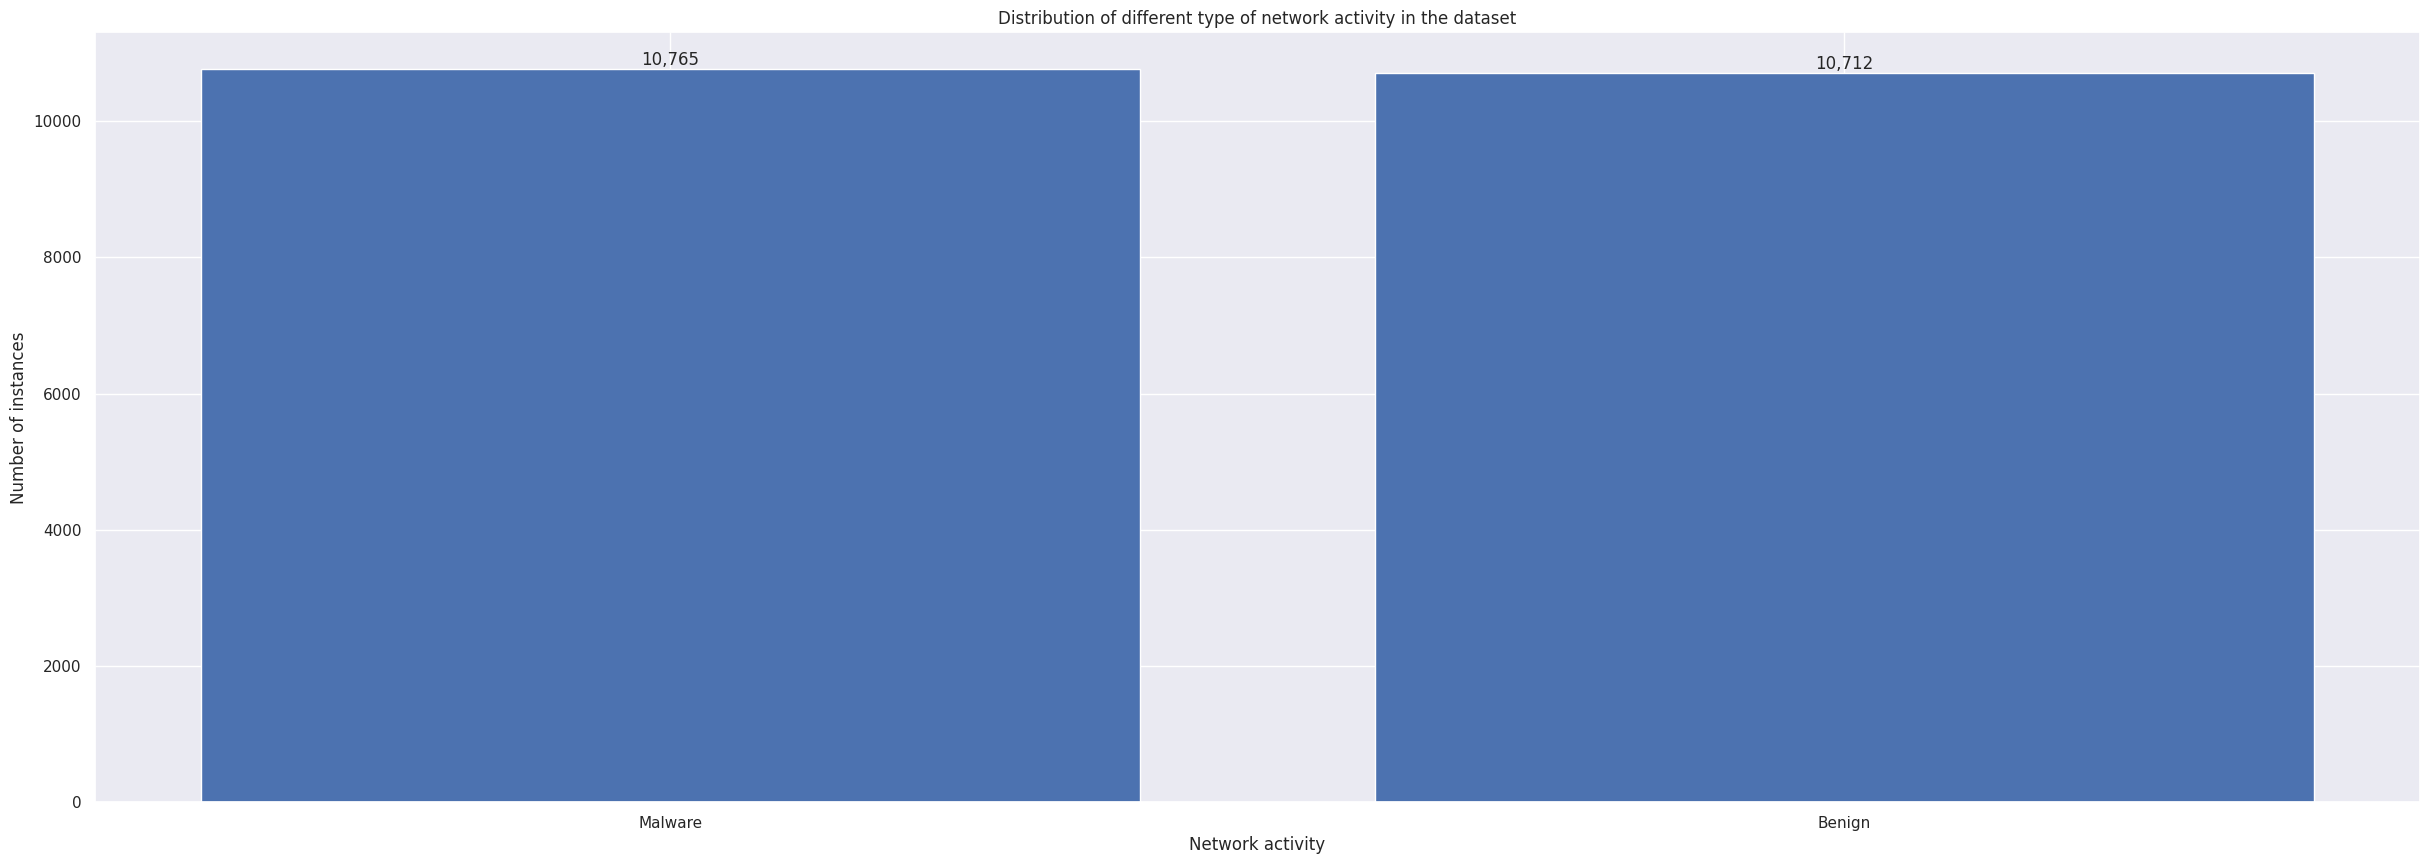

In [88]:
fig = plt.figure(figsize=(30, 10))

attack = new_dataset['Class'].value_counts()

attack_count = attack.values
attack_type = attack.index

bar = plt.bar(attack_type, attack_count, align='center')

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, format(height, ','), ha='center', va='bottom')

plt.title('Distribution of different type of network activity in the dataset')
plt.xlabel('Network activity')
plt.ylabel('Number of instances')
plt.grid(True)
plt.show()

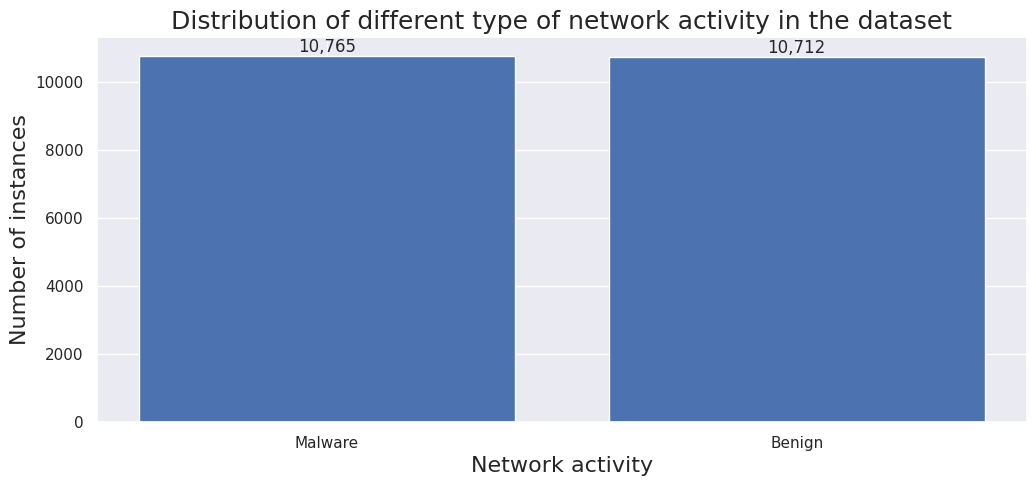

In [89]:
fig = plt.figure(figsize=(12, 5))

attack = new_dataset['Class'].value_counts()

attack_count = attack.values
attack_type = attack.index

bar = plt.bar(attack_type, attack_count, align='center')

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, format(height, ','), ha='center', va='bottom', fontsize=12)

plt.title('Distribution of different type of network activity in the dataset', fontsize=18)
plt.xlabel('Network activity', fontsize=16)
plt.ylabel('Number of instances', fontsize=16)
plt.grid(True)
plt.show()

# Data Preparation

In [90]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EntryPoint               21477 non-null  int64  
 1   bytes_on_last_page       21477 non-null  int64  
 2   pages_in_file            21477 non-null  int64  
 3   relocations              21477 non-null  int64  
 4   size_of_header           21477 non-null  int64  
 5   min_extra_paragraphs     21477 non-null  int64  
 6   max_extra_paragraphs     21477 non-null  int64  
 7   init_ss_value            21477 non-null  int64  
 8   init_sp_value            21477 non-null  int64  
 9   init_ip_value            21477 non-null  int64  
 10  init_cs_value            21477 non-null  int64  
 11  over_lay_number          21477 non-null  int64  
 12  address_of_ne_header     21477 non-null  int64  
 13  SizeOfCode               21477 non-null  int64  
 14  SizeOfInitializedData 

In [91]:
labels = new_dataset['Class']
features = new_dataset.drop(labels=['Class'], axis=1)

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42, stratify=labels)


In [93]:
X_train.shape, X_test.shape

((17181, 52), (4296, 52))

# Scaling features to a range

In [94]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, QuantileTransformer
from sklearn.compose import ColumnTransformer

In [95]:
categorical_features = features.select_dtypes(exclude=["int64", "float64"]).columns
numeric_features = features.select_dtypes(exclude=[object]).columns

preprocessor = ColumnTransformer(transformers=[
    ('categoricals', OneHotEncoder(drop='first', sparse=False, handle_unknown='error'), categorical_features),
    ('numericals', QuantileTransformer(), numeric_features)
])

In [96]:
columns = numeric_features.tolist()

X_train = pd.DataFrame(preprocessor.fit_transform(X_train), columns=columns)
X_test = pd.DataFrame(preprocessor.transform(X_test), columns=columns)


In [98]:
le = LabelEncoder()

y_train = pd.DataFrame(le.fit_transform(y_train), columns=["Class"])
y_test = pd.DataFrame(le.transform(y_test), columns=["Class"])


In [99]:
X_train.shape, X_test.shape

((17181, 52), (4296, 52))

In [100]:
y_train.shape, y_test.shape

((17181, 1), (4296, 1))

#Models Implementation

#Logistic Regresssion

In [101]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression()

lor.fit(X_train,y_train)

Y_pred_lor = lor.predict(X_test)

In [102]:
cm = confusion_matrix(y_test, Y_pred_lor)
print(cm)
accuracy_score(y_test, Y_pred_lor)

[[2116   27]
 [   5 2148]]


0.9925512104283054

In [103]:
print(classification_report(y_test, Y_pred_lor))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2143
           1       0.99      1.00      0.99      2153

    accuracy                           0.99      4296
   macro avg       0.99      0.99      0.99      4296
weighted avg       0.99      0.99      0.99      4296



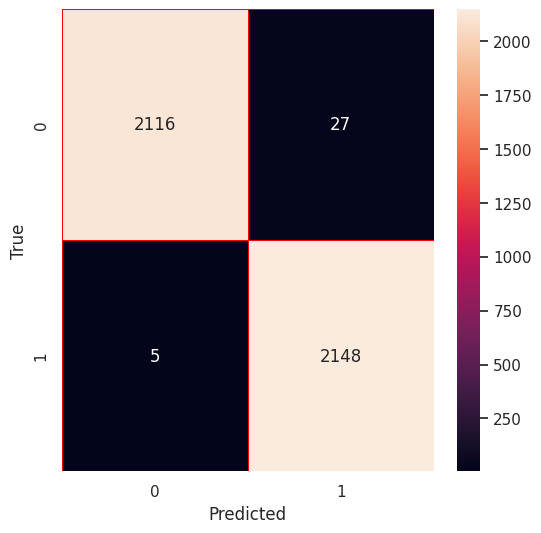

In [104]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# predict on test set
Y_pred_lor = lor.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, Y_pred_lor)

# plot confusion matrix using seaborn heatmap
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, linewidth=0.5,linecolor="red", fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


IndexError: ignored

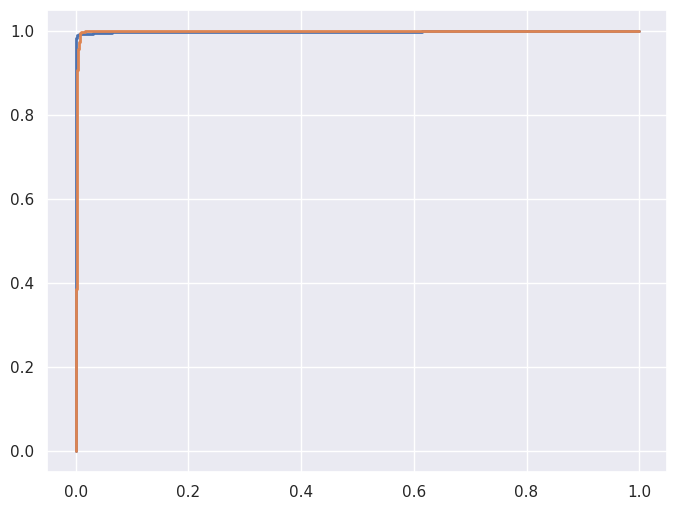

In [105]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels (one-hot encoding)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])  # Replace [0, 1, 2, 3, 4, 5, 6] with your actual class labels

# Initialize an empty dictionary to store ROC AUC values for each class
roc_auc = {}

# Get probability predictions for each class
Y_prob_lor = lor.predict_proba(X_test)  # Replace with your model and testing data

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
num_classes = y_test_bin.shape[1]

for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], Y_prob_lor[:, i])  # Use probability predictions
    roc_auc[i] = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.show()


#Gradient Boosting Machines

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

gbm = GradientBoostingClassifier()

gbm.fit(X_train, y_train)

GradientBoostingClassifier()

In [107]:

Y_pred_gbm = gbm.predict(X_test)

print("Accuracy score: {:.2f}".format(accuracy_score(y_test, Y_pred_gbm)))
print(classification_report(y_test, Y_pred_gbm))


Accuracy score: 0.99
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2143
           1       0.99      1.00      0.99      2153

    accuracy                           0.99      4296
   macro avg       0.99      0.99      0.99      4296
weighted avg       0.99      0.99      0.99      4296



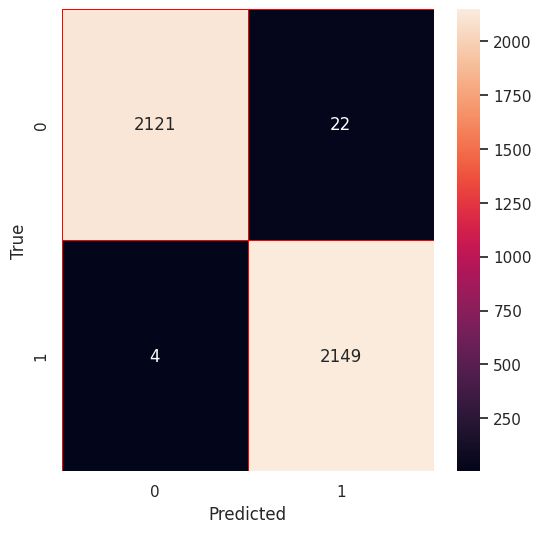

In [108]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# predict on test set
Y_pred_gbm = gbm.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, Y_pred_gbm)

# plot confusion matrix using seaborn heatmap
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, linewidth=0.5,linecolor="red", fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


IndexError: ignored

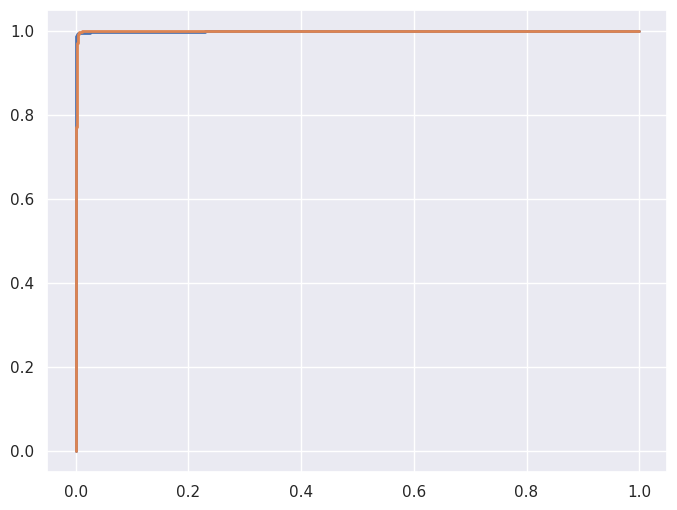

In [109]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels (one-hot encoding)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])  # Replace [0, 1, 2, 3, 4, 5, 6] with your actual class labels

# Initialize an empty dictionary to store ROC AUC values for each class
roc_auc = {}

# Get probability predictions for each class
Y_prob_gbm = gbm.predict_proba(X_test)  # Replace with your model and testing data

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
num_classes = y_test_bin.shape[1]

for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], Y_prob_gbm[:, i])  # Use probability predictions
    roc_auc[i] = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.show()


#Decision Tree

In [110]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(20):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=4)

In [111]:
Y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, Y_pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2143
           1       0.99      0.99      0.99      2153

    accuracy                           0.99      4296
   macro avg       0.99      0.99      0.99      4296
weighted avg       0.99      0.99      0.99      4296



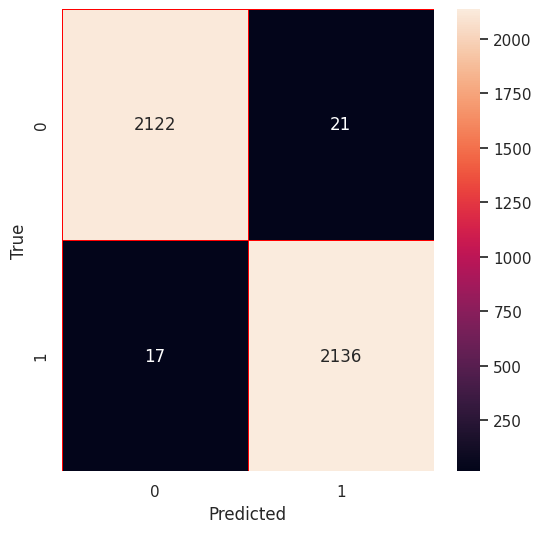

In [112]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# predict on test set
Y_pred_dt = dt.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, Y_pred_dt)

# plot confusion matrix using seaborn heatmap
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, linewidth=0.5,linecolor="red", fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


IndexError: ignored

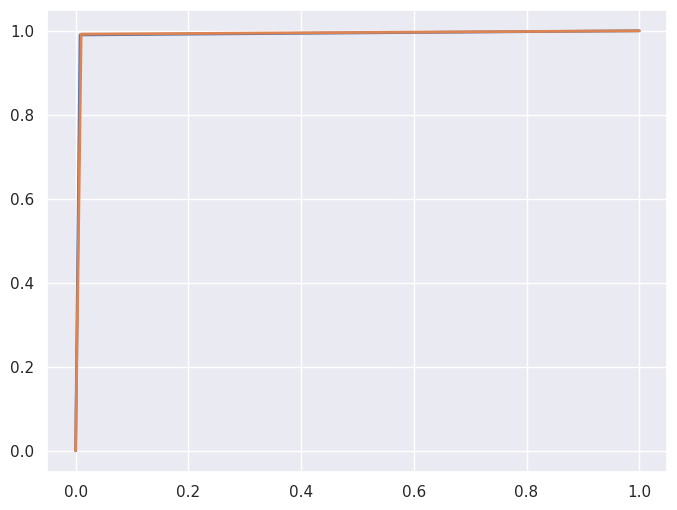

In [113]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels (one-hot encoding)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])  # Replace [0, 1, 2, 3, 4, 5, 6] with your actual class labels

# Initialize an empty dictionary to store ROC AUC values for each class
roc_auc = {}

# Get probability predictions for each class
Y_prob_dt = dt.predict_proba(X_test)  # Replace with your model and testing data

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
num_classes = y_test_bin.shape[1]

for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], Y_prob_dt[:, i])  # Use probability predictions
    roc_auc[i] = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.show()


#Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(20):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=7)

In [ ]:
Y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, Y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22902
           1       1.00      1.00      1.00       389
           2       1.00      1.00      1.00      1556
           3       1.00      1.00      1.00     12346
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00      4623
           6       1.00      1.00      1.00       424

    accuracy                           1.00     42247
   macro avg       1.00      1.00      1.00     42247
weighted avg       1.00      1.00      1.00     42247



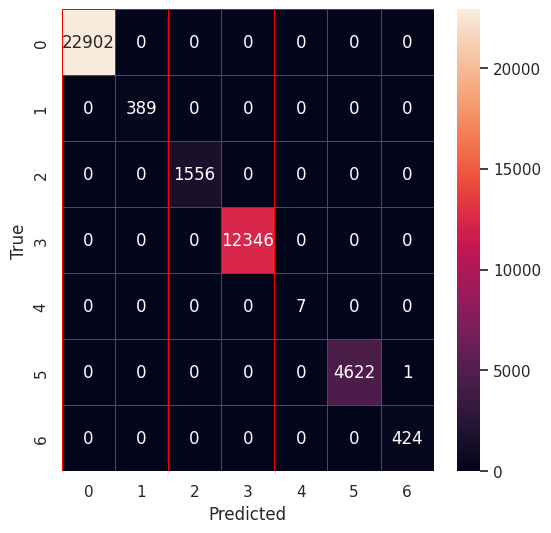

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# predict on test set
Y_pred_rf = rf.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, Y_pred_rf)

# plot confusion matrix using seaborn heatmap
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, linewidth=0.5,linecolor="red", fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


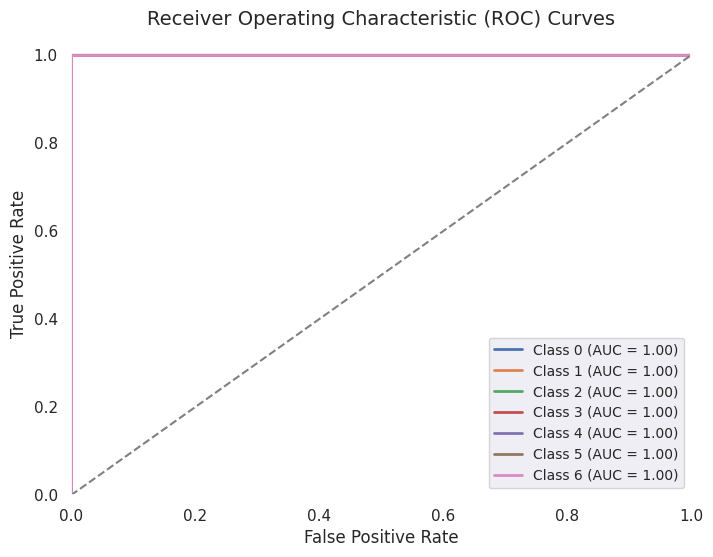

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels (one-hot encoding)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])  # Replace [0, 1, 2, 3, 4, 5, 6] with your actual class labels

# Initialize an empty dictionary to store ROC AUC values for each class
roc_auc = {}

# Get probability predictions for each class
Y_prob_rf = rf.predict_proba(X_test)  # Replace with your model and testing data

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
plt.gca().set_facecolor('white')  # Set background color to white
num_classes = y_test_bin.shape[1]

for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], Y_prob_rf[:, i])  # Use probability predictions
    roc_auc[i] = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(False)  # Remove grid
plt.show()


#CatBoost

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 3.8 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

# create an instance of the model
cat = CatBoostClassifier()

# train the model
cat.fit(X_train, y_train, eval_set=(X_test, y_test))

Learning rate set to 0.119642
0:	learn: 1.2821766	test: 1.2822745	best: 1.2822745 (0)	total: 489ms	remaining: 8m 8s
1:	learn: 0.9907618	test: 0.9908556	best: 0.9908556 (1)	total: 877ms	remaining: 7m 17s
2:	learn: 0.8018708	test: 0.8019587	best: 0.8019587 (2)	total: 1.3s	remaining: 7m 11s
3:	learn: 0.6642432	test: 0.6643372	best: 0.6643372 (3)	total: 1.69s	remaining: 7m 1s
4:	learn: 0.5587155	test: 0.5587908	best: 0.5587908 (4)	total: 2.08s	remaining: 6m 54s
5:	learn: 0.4746252	test: 0.4746850	best: 0.4746850 (5)	total: 2.48s	remaining: 6m 51s
6:	learn: 0.4063294	test: 0.4063599	best: 0.4063599 (6)	total: 2.88s	remaining: 6m 48s
7:	learn: 0.3504433	test: 0.3504800	best: 0.3504800 (7)	total: 3.59s	remaining: 7m 25s
8:	learn: 0.3037010	test: 0.3037494	best: 0.3037494 (8)	total: 4.36s	remaining: 7m 59s
9:	learn: 0.2639091	test: 0.2639596	best: 0.2639596 (9)	total: 5.39s	remaining: 8m 53s
10:	learn: 0.2298965	test: 0.2299352	best: 0.2299352 (10)	total: 6.28s	remaining: 9m 24s
11:	learn: 0.2

In [ ]:
# make predictions
Y_pred_cat = cat.predict(X_test)

# print the accuracy score and classification report
print("Accuracy score:", cat.score(X_test, y_test))
print(classification_report(y_test, Y_pred_cat))

Accuracy score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22902
           1       1.00      1.00      1.00       389
           2       1.00      1.00      1.00      1556
           3       1.00      1.00      1.00     12346
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00      4623
           6       1.00      1.00      1.00       424

    accuracy                           1.00     42247
   macro avg       1.00      1.00      1.00     42247
weighted avg       1.00      1.00      1.00     42247



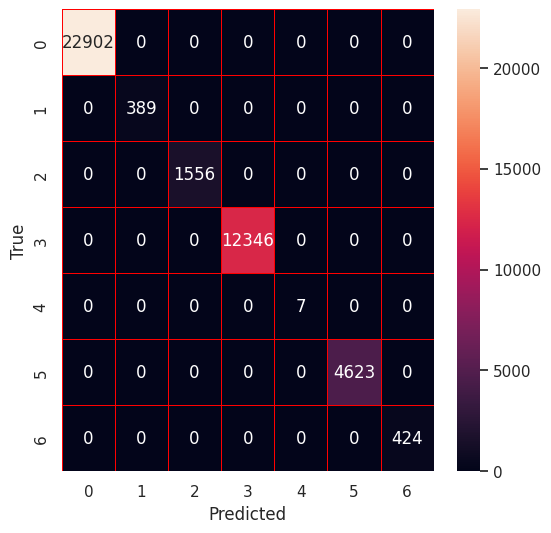

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# predict on test set
Y_pred_cat = cat.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, Y_pred_cat)

# plot confusion matrix using seaborn heatmap
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, linewidth=0.5,linecolor="red", fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


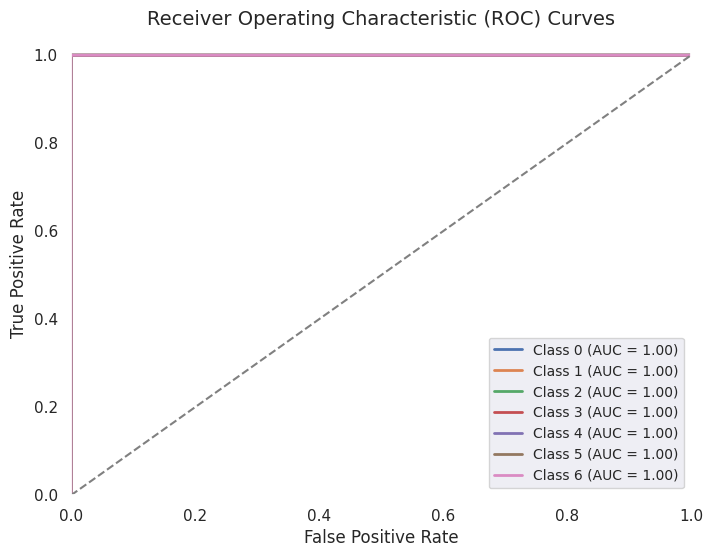

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels (one-hot encoding)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])  # Replace [0, 1, 2, 3, 4, 5, 6] with your actual class labels

# Initialize an empty dictionary to store ROC AUC values for each class
roc_auc = {}

# Get probability predictions for each class
Y_prob_cat = cat.predict_proba(X_test)  # Replace with your model and testing data

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
plt.gca().set_facecolor('white')  # Set background color to white
num_classes = y_test_bin.shape[1]

for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], Y_prob_cat[:, i])  # Use probability predictions
    roc_auc[i] = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(False)  # Remove grid
plt.show()


#Comparison of ML Models

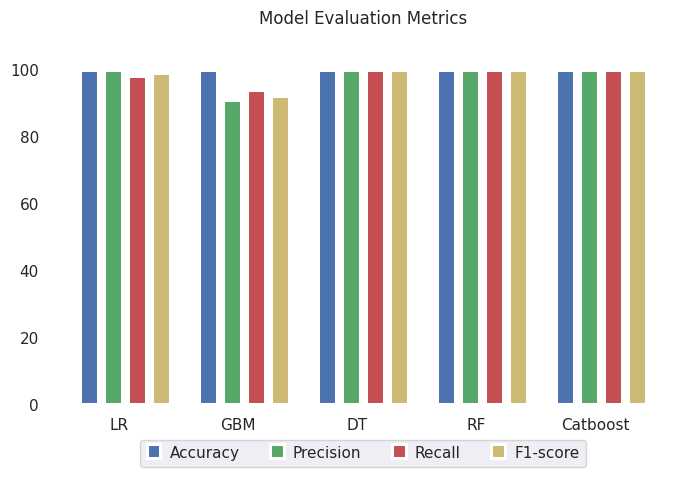

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Performance measures for each model and class
models = ['LR', 'GBM', 'DT', 'RF', 'Catboost']
accuracy = [100, 100, 100, 100, 100]
precision = [100, 91, 100, 100, 100]
recall = [98, 94, 100, 100, 100]
f1_score = [99, 92, 100, 100, 100]

# Set the width of the bars
bar_width = 0.15

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width + 0.05 for x in r1]
r3 = [x + 2*bar_width + 0.1 for x in r1]
r4 = [x + 3*bar_width + 0.15 for x in r1]  # Adjust the offset here

# Create the bar chart with a white background and no grid
plt.figure(figsize=(7, 5))
plt.gca().set_facecolor('white')  # Set background color to white
plt.grid(False)  # Remove grid

plt.bar(r1, accuracy, color='b', width=bar_width, edgecolor='white', linewidth=2.2, label='Accuracy')
plt.bar(r2, precision, width=bar_width, color='g', edgecolor='white', linewidth=2.2, label='Precision')
plt.bar(r3, recall, color='r', width=bar_width, edgecolor='white', linewidth=2.2, label='Recall')
plt.bar(r4, f1_score, color='y', width=bar_width, edgecolor='white', linewidth=2.2, label='F1-score')

# Add x-axis labels and tick labels
plt.xlabel('')
plt.ylabel('')
plt.title('Model Evaluation Metrics\n')

# Customize x-axis tick labels
plt.xticks(r1 + 1.5*bar_width + 0.025, models)  # Adjust the offset here

# Add a legend as a horizontal line below the plot
legend = plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=4, handlelength=1, handletextpad=0.5)

# Set the size of the bars in the legend to make them square
for handle in legend.legendHandles:
    handle.set_height(10)  # Adjust the size here
    handle.set_width(10)  # Adjust the size here

# Display the chart
plt.tight_layout()
plt.show()
